<a href="https://colab.research.google.com/github/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial 6: Neural Networks

Find it on GitHub: https://github.com/Parisa-Foroutan/Tutorials/blob/main/ADMI821_Session6.ipynb

Link to Datasets: [AMZN_train](https://drive.google.com/file/d/1cVpK7WrUA2-tWQe73BPFE5C4CZ3gT3iO/view?usp=sharing), [AMZN_test](https://drive.google.com/file/d/1oK4pXOQeU-8SIRAvuB7j-1TdiF9DvvTr/view?usp=sharing)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
tf.random.set_seed(123)

## Standard Feed Forward Neural Network:


In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X,y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=123)

In [5]:
raw_data = load_wine()
print(raw_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Encode class Values:

In [6]:
y_train[:5]

array([2, 0, 1, 1, 2])

In [7]:
from keras.utils import np_utils

y_train_d = np_utils.to_categorical(y_train) # Converts a class vector (integers) to binary class matrix.
y_test_d = np_utils.to_categorical(y_test)
y_train_d[:5,:]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

create MLP architecture:

In [8]:
mlp = models.Sequential()
mlp.add(layers.Dense(units=10, activation='relu'))
# second hidden layer
mlp.add(layers.Dense(units=8, activation='relu'))
mlp.add(layers.Dense(units=3, activation='softmax'))

#### Training the FFMLP on the Training set

In [9]:
mlp.compile(optimizer= 'adam', loss= 'categorical_crossentropy' , metrics=['accuracy']) 
mlp.fit(X_train, y_train_d, batch_size=32, epochs=100,  validation_data=(X_test, y_test_d),  verbose=1)
score, acc = mlp.evaluate(X_test, y_test_d, batch_size=32)

Epoch 1/100
5/5 [==============================] - 1s 69ms/step - loss: 195.1838 - accuracy: 0.4225 - val_loss: 214.6431 - val_accuracy: 0.3056
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 180.7779 - accuracy: 0.4225 - val_loss: 200.2826 - val_accuracy: 0.3056
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 166.3921 - accuracy: 0.4225 - val_loss: 186.4334 - val_accuracy: 0.3056
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 152.2845 - accuracy: 0.4225 - val_loss: 173.1430 - val_accuracy: 0.3056
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 138.7081 - accuracy: 0.4225 - val_loss: 160.1826 - val_accuracy: 0.3056
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 125.4552 - accuracy: 0.4225 - val_loss: 147.5164 - val_accuracy: 0.3056
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 111.7965 - accuracy: 0.4225 - val_loss: 135.4092 - val_accuracy: 0

#### Making the predictions and evaluating the model

In [11]:
y_pred_nn = mlp.predict(X_test)
print(y_pred_nn[-5:,])
predicted_class = np.argmax(y_pred_nn, axis=1)
predicted_class[-5:,]

[[0.8375839  0.01470784 0.14770818]
 [0.5025387  0.13563854 0.36182284]
 [0.10470537 0.7722674  0.12302719]
 [0.54376745 0.12234156 0.33389097]
 [0.29290554 0.47582817 0.23126628]]


array([0, 0, 1, 0, 1])

## Deep Neural Networks

### Convolutional Neural Networks

##### Data Preprocessing

In [31]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # datasets from keras
assert train_images.shape == (50000, 32, 32, 3)
assert test_images.shape == (10000, 32, 32, 3)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


[1]


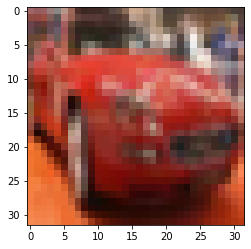

In [32]:
# Show one of the images from the training dataset
print(train_labels[5])
plt.imshow(train_images[5])

##### CNN Architecture

![](https://drive.google.com/uc?export=view&id=1MZUsl8dQkIQqXBqAp1jLN8eKHTTyaaFp)
[source](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In [39]:
# Initialising the CNN
cnn = models.Sequential()
# Convolution
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
# Pooling
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))
# Adding a second convolutional layer
cnn.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(layers.MaxPool2D(pool_size=2, strides=2))
# Flattening
cnn.add(layers.Flatten())
# Full Connection
cnn.add(layers.Dense(units=64, activation='relu'))
# Output Layer
cnn.add(layers.Dense(units=10))

cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_9 (Dense)             (None, 64)               

##### Training the CNN

In [40]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 65s 41ms/step - loss: -40.8845 - accuracy: 0.1001 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: -41.0939 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 63s 40ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 62s 40ms/step - loss: -41.0938 - accuracy: 0.1000 - val_loss: -41.0938 - val_accuracy: 0.1000


##### Evaluate test predictions

In [41]:
test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 4s 12ms/step - loss: -41.0938 - accuracy: 0.1000
0.10000000149011612


## Probablistic Neural Networks (Classification)

with a given training dataset \{$x_{n}, y_{n}$}, n=1,...,N, where each label $y_{n}$ represents the class of $x_{n}$, the basic idea of PNN is to learn a probabillity distribution function for each class. 

![](https://drive.google.com/uc?export=view&id=1Ri42d59mR61ZNf_bLzZQryFyGwM_AYqz)
[image source](https://www.researchgate.net/publication/259390898_Parallel_and_local_learning_for_fast_Probabilistic_Neural_Networks_in_scalable_data_mining)


http://neupy.com/apidocs/neupy.algorithms.rbfn.pnn.html

In [12]:
!pip install neupy
from google.colab import output
output.clear()

In [13]:
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold

from neupy.algorithms import PNN


dataset = datasets.load_wine()
data, target = dataset.data, dataset.target

print("> Start classify wine quality dataset")
skfold = StratifiedKFold(n_splits=10)

for i, (train, test) in enumerate(skfold.split(data, target), start=1):
    x_train, x_test = data[train], data[test]
    y_train, y_test = target[train], target[test]

    pnn_network = PNN(std=0.6, verbose=False) # Standard deviation for the Probability Density Function (PDF).
# If your input features have high values than std should also be high.
    pnn_network.train(x_train, y_train)
    result = pnn_network.predict(x_test)

    n_correct_pred = np.sum(result == y_test)
    n_test_samples = test.size

    print("Test #{}: {} correct out of {}".format(i, n_correct_pred, n_test_samples))

> Start classify wine quality dataset
Test #1: 16 correct out of 18
Test #2: 13 correct out of 18
Test #3: 12 correct out of 18
Test #4: 11 correct out of 18
Test #5: 12 correct out of 18
Test #6: 14 correct out of 18
Test #7: 14 correct out of 18
Test #8: 13 correct out of 18
Test #9: 14 correct out of 17
Test #10: 14 correct out of 17


## Radial Basis Function Neural Network 

RBF models the data using smooth transitioning circular shapes instead of sharp cut-off circles. Additionally, RBF gives information about the confidence rate of prediction which the K-means Clustering algorithm can’t.

![](https://drive.google.com/uc?export=view&id=1iOOQthoNifkPxg2Sg8z5YCAt98RoSamJ)
 ![](https://drive.google.com/uc?export=view&id=1KJre0KOkin4Hu_WVdoP8bg8FLUqMpe63) 
 
 [source](https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319)


RBF code adapted from [here](https://www.madrasresearch.org/post/radial-basis-functions-neural-networks). 

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import math

In [16]:
# Nasa Dataset
df = pd.read_csv("/content/nasa.csv")

X_c = df.iloc[:, 1:-1] 
y_c = df["Hazardous"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 123)

# Scale the data 
scaler = StandardScaler()
X_train_c= scaler.fit_transform(X_train_c)
X_test_c= scaler.transform(X_test_c)

determine centers of the radial base neurons using KMeans:

In [23]:
k_center=10
kmeans = KMeans(n_clusters=k_center, init="k-means++", max_iter=100, random_state=123)
kmeans.fit(X_train_c)
center = kmeans.cluster_centers_
center.shape # (k_center, X_train_c.shape[1])

(10, 25)

determine σ:

In [24]:
max=0
for i in range(k_center):
  for j in range(k_center):
    d=np.linalg.norm(center[i] - center[j]) # distance norm betwen two hidden neurons
    if(d>max):
      max = d
d = max
sigma = d/math.sqrt(2*k_center)

determine the output of radial basis hidden neurons:

In [25]:
phi = np.empty((X_train_c.shape[0] , k_center), dtype=float)

for i in range(X_train_c.shape[0]):
  for j in range(k_center):
    dist = np.linalg.norm(X_train_c[i] - center[j])
    phi[i][j] = math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

weight matrix W to train the network:

In [26]:
phiTphi_inv = np.linalg.inv(np.dot(phi.T, phi))
w = np.dot(np.dot(phiTphi_inv, phi.T), y_train_c)

Matrix phi for test data:

In [27]:
phi_test = np.empty((X_test_c.shape[0] , k_center), dtype=float)

for i in range(X_test_c.shape[0]):
  for j in range(k_center):
    dist = np.linalg.norm(X_test_c[i] - center[j])
    phi_test[i][j] = math.exp(- math.pow(dist,2)/math.pow(2*sigma,2))

Prediction Performance:

In [28]:
y_pred = np.dot(phi_test, w)
y_pred= 0.5*(np.sign(y_pred-0.5)+1)

acc = accuracy_score(y_pred, y_test_c)
acc

0.7204301075268817